# In this paper I'm looking for cosmological variantions parameters acroos the sky (Gaztañaga & Fosalba,2020)

In [2]:
# Importing libraries
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

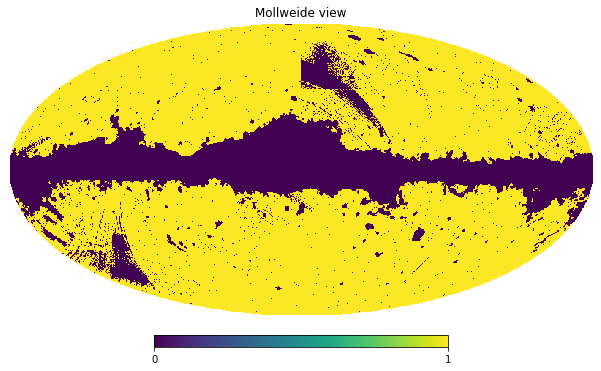

In [12]:
# Reading the map and masks
planck_map = hp.read_map('/home/akozameh/cmblss/data/COM_CMB_IQU-smica_2048_R3.00_oe2.fits')
m_1 = hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')
m_2 = hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-HM-Misspix-Mask-Int_2048_R3.00.fits')

# Convert masks to numpy arrays with boolean dtype
m_1 = np.array(m_1, dtype=bool)
m_2 = np.array(m_2, dtype=bool)

# Combine masks using AND (common mask + Odd-Even missing pixels)
combined_mask = m_1 & m_2

# Visualize the mask
hp.mollview(combined_mask)

In [66]:
hp.write_map("combined_mask.fits", combined_mask, overwrite=True)

setting the output map dtype to [dtype('bool')]


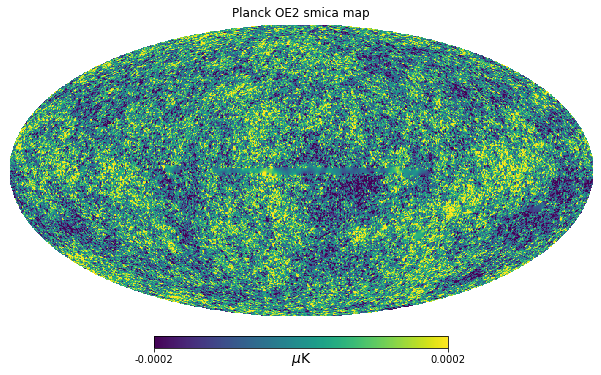

In [42]:
hp.mollview(planck_map, min=-200e-6, max=200e-6, title='Planck OE2 smica map', unit ='$\mu$K')     

In [67]:
# Masked map
#mask=hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')
mask_1=hp.read_map('/home/akozameh/cmblss/code/cmblss-main/combined_mask.fits')
smica_masked=hp.ma(planck_map)
smica_masked.mask=np.logical_not(mask_1)


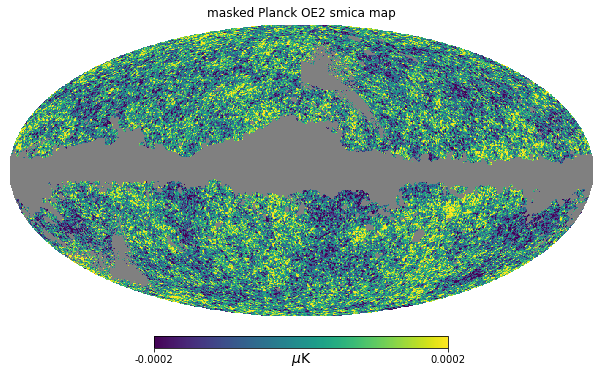

In [68]:
hp.mollview(smica_masked,min=-200e-6, max=200e-6, title='masked Planck OE2 smica map', unit ='$\mu$K')

In [69]:
# lowing resolution of map up to NSIDE=4 to set the disc where I am going to perform the analysis.
nside=4
smica_masked=hp.ud_grade(smica_masked, nside)

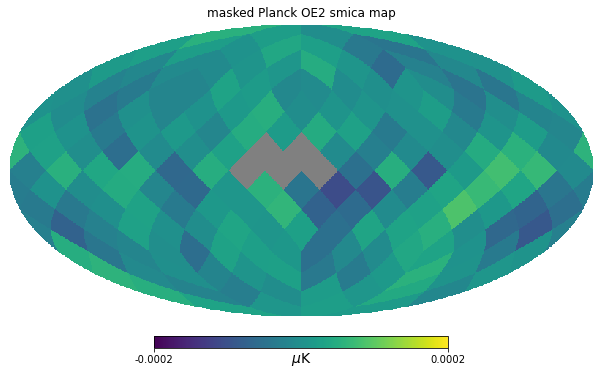

In [70]:
hp.mollview(smica_masked,min=-200e-6, max=200e-6, title='masked Planck OE2 smica map', unit ='$\mu$K')

In [71]:
# Number of pixels of map at this resolution
NPIX = hp.nside2npix(nside)
print(NPIX)

192


In [105]:
# We can retrieve the colalitude and longitude of each pixels on the map
theta, phi = hp.pix2ang(nside=4, ipix=np.arange(0,192,1))

In [106]:
theta[1], phi[1]

(0.20448019896853498, 2.356194490192345)

In [119]:
# Set main nside
nside_main = 4

# Number of pixels for the given nside
npix_main = hp.nside2npix(nside_main)

# Retrieve colatitude (theta) and longitude (phi) of each pixel
theta_main, phi_main = hp.pix2ang(nside=nside_main, ipix=np.arange(npix_main))

# Initialize vec array
vec_main = np.zeros((npix_main, 3))  # Assuming vec is a 3D vector for each element

# Initialize ipix list to store arrays of indices
ipix_main = []



In [122]:
# Set the size of the disc
disc_diameter=60
disc_radii = [np.radians(disc_diameter / 2) ]  # Convert to radians and use radius


In [123]:
# Iterate over the range of indices
for i in range(npix_main):
    vec_main[i]=hp.ang2vec(theta_main[i], phi_main[i])
    disc_indices = hp.query_disc(nside=nside_main, vec=vec_main[i], radius=disc_radii)
    smica_masked.mask[disc_indices] = True  # Apply mask

TypeError: must be real number, not list

NameError: name 'disc_indices' is not defined